In [4]:
# from crosscompute.scripts import get_configuration_paths_by_format
from os.path import join

examples_folder = '../../crosscompute-examples/reports'
configuration_folder = examples_folder + '/randomize-histograms'
# get_configuration_paths_by_format(configuration_folder)
configuration_path = join(configuration_folder, 'serve.yml')

In [5]:
# Load configuration file
import yaml
d = yaml.safe_load(open(configuration_path, 'rt'))
d

{'crosscompute': '0.9.0',
 'name': 'Randomize Histograms',
 'version': '0.0.1',
 'input': {'variables': [{'id': 'mean',
    'view': 'number',
    'path': 'variables.json'},
   {'id': 'variance', 'view': 'number', 'path': 'variables.json'},
   {'id': 'value_count', 'view': 'number', 'path': 'variables.json'},
   {'id': 'bin_count', 'view': 'number', 'path': 'variables.json'}]},
 'output': {'variables': [{'id': 'histogram-1d',
    'view': 'image',
    'path': 'histogram-1d.png'},
   {'id': 'histogram-2d', 'view': 'image', 'path': 'histogram-2d.png'}],
  'templates': [{'path': 'report.md'}]},
 'tests': [{'folder': 'tests/standard'}],
 'batches': [{'folder': 'batches/a'}, {'folder': 'batches/b'}],
 'display': {'style': {'path': 'report.css'}, 'layout': 'output'}}

In [6]:
d['output'].keys()

dict_keys(['variables', 'templates'])

In [7]:
# Get output variables
d['output']['variables']

[{'id': 'histogram-1d', 'view': 'image', 'path': 'histogram-1d.png'},
 {'id': 'histogram-2d', 'view': 'image', 'path': 'histogram-2d.png'}]

In [8]:
d['output']['templates']

[{'path': 'report.md'}]

In [9]:
# Get input variables
d['input']['variables']

[{'id': 'mean', 'view': 'number', 'path': 'variables.json'},
 {'id': 'variance', 'view': 'number', 'path': 'variables.json'},
 {'id': 'value_count', 'view': 'number', 'path': 'variables.json'},
 {'id': 'bin_count', 'view': 'number', 'path': 'variables.json'}]

In [10]:
ls

 0.7/                                mapbox.html
 0.8/                               'Restore Functionality 20211019.ipynb'
 choropleth-20211020.html            target.html
 choropleth-graffiti-20211020.html   template.html
 image-experiment.html


In [ ]:
# Inject mapbox elements if map-mapbox exists

In [11]:
configuration_folder

'../../crosscompute-examples/reports/randomize-histograms'

In [16]:
relative_folder = d['tests'][0]['folder']

In [19]:
test_folder = join(configuration_folder, relative_folder)
test_folder

'../../crosscompute-examples/reports/randomize-histograms/tests/standard'

In [21]:
ls $test_folder/input

variables.json


In [22]:
input_folder = join(test_folder, 'input')
variables_path = join(input_folder, 'variables.json')
variables_path

'../../crosscompute-examples/reports/randomize-histograms/tests/standard/input/variables.json'

In [ ]:
# Get variable definitions
variable_definitions = d['input']['variables']
variable_definitions_by_path

for (
    path, variable_definitions,
) in variable_definitions_by_path.items():
    
    pass

# For each variable definition,
    # Get path
    # Get value from path

In [23]:
cat $variables_path

{
  "mean": 0,
  "variance": 1,
  "value_count": 500,
  "bin_count": 10
}


In [ ]:
pip install -U matplotlib

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# np.random.seed(19680801)
rng = np.random.default_rng()

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
# x = mu + sigma * np.random.randn(437)
x = mu + sigma * rng.standard_normal(500)

In [69]:
# mean, variance, value_count, bin_count, random_seed

In [70]:
x.shape

(500,)

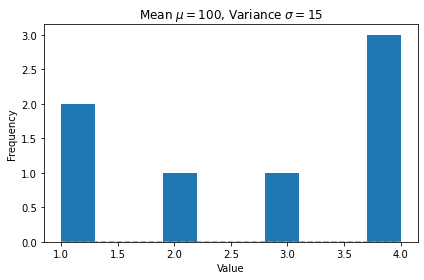

In [86]:
num_bins = 10

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Mean $\mu=100$, Variance $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.savefig('histogram-1d.png')
plt.show()

<Figure size 432x288 with 0 Axes>

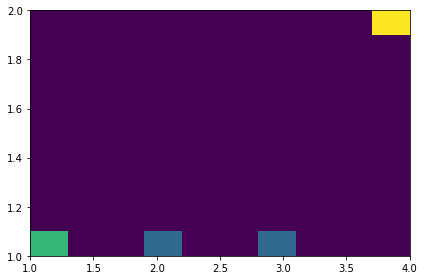

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(tight_layout=True)
x = [1, 2, 3, 4, 1, 4, 4]
y = [1, 1, 1, 2, 1, 2, 2]
hist = ax.hist2d(x, y)

In [74]:
import numpy as np
rng = np.random.default_rng()

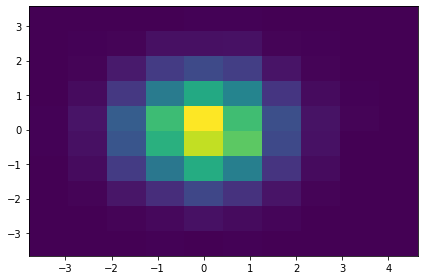

In [79]:
fig, ax = plt.subplots(tight_layout=True)
# xs = rng.integers(0, 10, 1000)
# ys = rng.integers(0, 10, 1000)
xs = rng.standard_normal(10000)
ys = rng.standard_normal(10000)
hist = ax.hist2d(xs, ys)

In [82]:
fig.savefig('histogram-2d.png')

In [83]:
ls

 0.7/                                mapbox.html
 0.8/                               'Restore Functionality 20211019.ipynb'
 choropleth-20211020.html            target.html
 choropleth-graffiti-20211020.html   template.html
 histogram-2d.png


In [76]:
import markdown
markdown.markdown('*hello*')

'<p><em>hello</em></p>'

In [77]:
from os.path import expanduser
folder = expanduser(
    '~/Projects/crosscompute-examples'
    '/reports/randomize-histograms')
folder

'/home/rhh/Projects/crosscompute-examples/reports/randomize-histograms'

In [78]:
from os.path import join
template_path = join(folder, 'report.md')
template_path

'/home/rhh/Projects/crosscompute-examples/reports/randomize-histograms/report.md'

In [ ]:
from markdown import markdown
print(markdown(open(template_path, 'rt').read()))

In [ ]:
from markdown import markdown
markdown('<p></p>')